# Introduction

In this time of impending recession in the IT sector, the number of cases of fraudulent job posting is increasing. According to the Federal Trade Commission, Americans were scammed out of $68 million in the first quarter of
2022 due to fraudulent business and job opportunities. Employment-related scams have been a persistent problem,
but they increased in 2020 as criminals preyed on people who had lost their jobs due to Covid. Employment scams
have only become more sophisticated, so it’s critical to be cautious as a job seeker. To address this issue, our project
aims to leverage the power of Machine Learning models to predict the genuineness of Job postings based on history data.

# Background

Classification is a technique for categorizing data into a set number of groups. Its main goal is to determine
which category/class a new data set belongs to. A classification model attempts to derive some conclusion from the
training input values. It will predict the new data class labels/categories. Classification can be used to perform a wide
range of tasks, including speech recognition, handwriting recognition, biometric identification, document classification,
and so on.

Our project’s goal is to be able to classify job postings as legitimate or not based on the data attributes used
to train the model. Because we have the output label for the data points, this falls under the Supervised Machine
Learning use case, and for our project, we are using classification models such as Decision Tree, K Nearest Neighbours,
Bayes Classifier, etc. In addition, we hope to discover valuable patterns in the data by using various visualization
techniques to gain a better understanding of the data.

# Methodology

## Project Imports

This project contains a requirement.txt file. For setting up the project, run the following command in your running environment:

pip install -r ./requirements.txt

In [15]:
#Data manipulation libraries
import pandas as pd
import numpy as np

#SMOTE libraries
from imblearn.over_sampling import SMOTE

#Model imports
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Model related imports
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.pipeline import Pipeline

#Graphical imports
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate

# Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

## Data selection

The dataset for this project can be found at the link: https://www.kaggle.com/datasets/shivamb/real-or-
fake-fake-jobposting-prediction. The dataset consists of 17880 data points, of which 866 are classified as fake
job postings under the ’fraudulent’ attribute. It also consists of data elements such as job title, location of work,
department of the job role, salary range and other metadata related to job profile. We are removing Job IDs as
they do not contribute to any decision-making process. The dataset also contains NULL elements in some of the
attributes as well as duplicate entries - for which proper cleaning techniques are applied.

In [2]:
filename = "P12_fake_job_postings.csv"

dataset = pd.read_csv(filename)
dataset_no_id = dataset.drop(columns=['job_id'])
dataset_no_id

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


## Data visualization

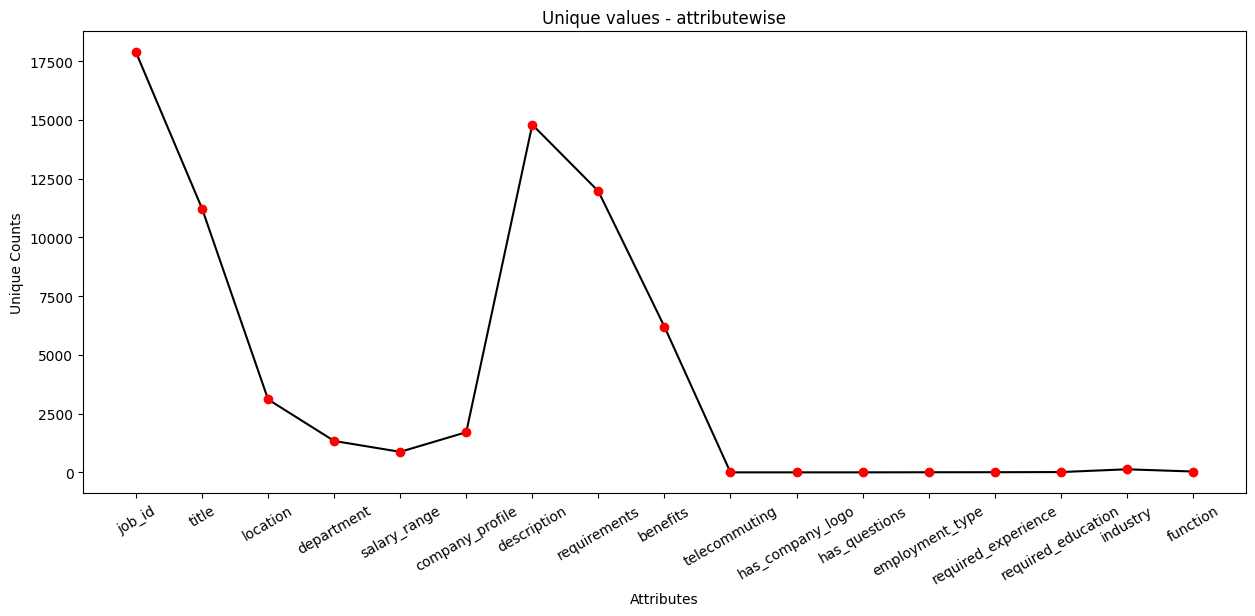

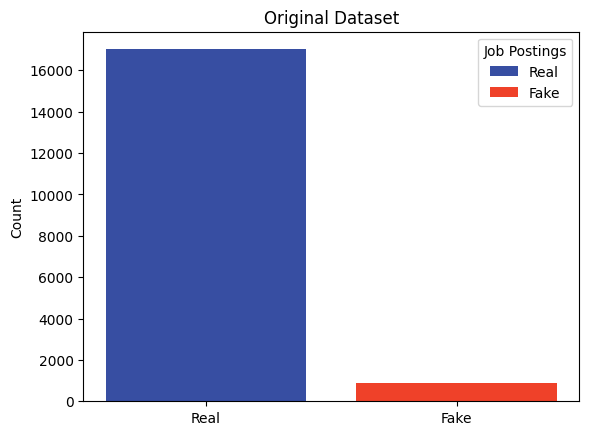

In [3]:
### intial_data_visualization(dataset):
# Getting unique values count
dataset_no_label = dataset.copy().drop(columns=['fraudulent'])
unique_vals = [dataset_no_label[col].unique().size for col in dataset_no_label.columns]
f_unique, ax_unique = plt.subplots(1,1,figsize=(15,6))
ax_unique.plot(list(dataset_no_label.columns), unique_vals, "k-")
ax_unique.plot(list(dataset_no_label.columns), unique_vals, "ro")
ax_unique.set_title("Unique values - attributewise")
ax_unique.set_xlabel("Attributes")
ax_unique.set_ylabel("Unique Counts")
ax_unique.set_xticklabels(list(dataset_no_label.columns), rotation=30)

def visualize_data_class(dataset, title):
    real_vals = (dataset["fraudulent"]==0).sum()
    fake_vals = (dataset["fraudulent"]==1).sum()
    labels = ["Real", "Fake"]
    vals = [real_vals, fake_vals]
    bar_colors=["#374EA2", "#EF4129"]
    f_fraud, ax_fraud = plt.subplots(1,1)
    ax_fraud.bar(labels, vals, label=labels, color=bar_colors)
    ax_fraud.set_ylabel("Count")
    ax_fraud.legend(title="Job Postings")
    ax_fraud.set_title(title)
    plt.show()

visualize_data_class(dataset, "Original Dataset")

## Data Preprocessing

The dataset used in this project has a lot of datapoints with the values of null, ’Not Applicable’ and
’Unsatisfied’. We are replacing those values with the value ’No Info’ because all three of these values are
corresponding to the same thing. We are removing 282 duplicate rows from the dataset which reduces its size to
17598. 

Also, the dataset is poorly balanced as most jobs are legitimate, with only a few exceptions.
When we analyzed the accuracy of our models, most of the data points are being classified as genuine or legitimate
due to this. So to get over this problem of imbalanced class distribution, we used a technique called SMOTE
- Synthetic Minority Oversampling Technique. Instead of just duplicating rows from minority class, there is
sampling and k nearest neighbor searching involved and then rows are synthesized with new data. This is
important as a well-balanced dataset would yield better results


Correlation Matrix:
                         title  location  department  salary_range  \
title                1.000000  0.108996    0.148319      0.119633   
location             0.108996  1.000000    0.036406      0.050909   
department           0.148319  0.036406    1.000000      0.069141   
salary_range         0.119633  0.050909    0.069141      1.000000   
company_profile      0.220294  0.075544    0.116334      0.105350   
employment_type     -0.076230  0.120573   -0.028196     -0.073005   
required_experience -0.026002 -0.019332    0.022856      0.112290   
required_education  -0.000442  0.069238    0.050986      0.103305   
industry             0.070233  0.046482    0.059183      0.091731   
function             0.043842 -0.037178    0.070448      0.071457   
fraudulent           0.052733  0.079086    0.035257      0.057828   

                     company_profile  employment_type  required_experience  \
title                       0.220294        -0.076230            -0.026

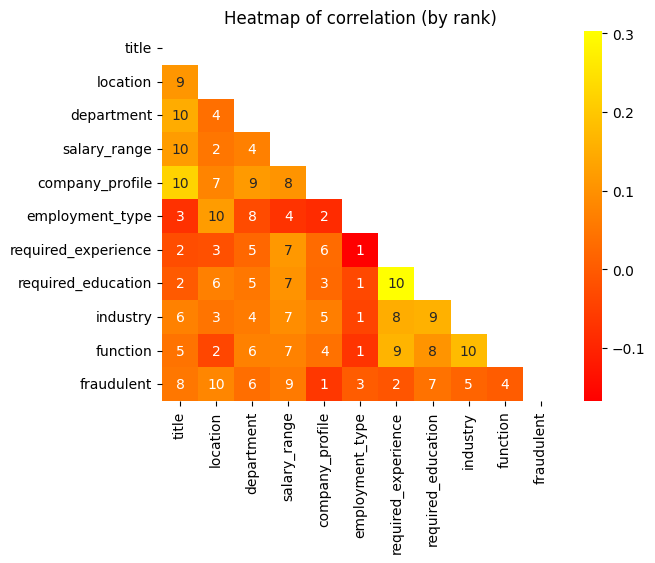

In [4]:
# fill null, not applicable and unspecified values with 'No Info'
dataset.fillna('No Info', inplace=True)
dataset = dataset.replace(['Not Applicable', 'Unspecified'], 'No Info')

# removing duplicate entries
dup_df = dataset[dataset.duplicated()]
no_dup_df = dataset.drop_duplicates()

# only keeping selected columns
df_selected_cols = no_dup_df[['title', 'location', 'department', 'salary_range' , 'company_profile', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'fraudulent']]
df_ccount = len(df_selected_cols)

# categorical to numerical conversion - https://pandas.pydata.org/docs/reference/api/pandas.factorize.html
category_cols = df_selected_cols.select_dtypes(['object']).columns
df_selected_cols[category_cols] = df_selected_cols[category_cols].apply(lambda x: pd.factorize(x)[0]) # codes, uniques = pd.factorize(cat)

def heatmap_correlation(df, corr_flag=False):
    # using heatmap to see correlation between data points
    correlation_matrix = df.corr()
    if corr_flag: print('\nCorrelation Matrix:\n', correlation_matrix)
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    f_heatmap, ax_heatmap = plt.subplots(1,1)
    i = sns.heatmap(correlation_matrix, mask=mask, annot=correlation_matrix.rank(axis="columns"), cmap="autumn", cbar=ax_heatmap)
    ax_heatmap.set_title("Heatmap of correlation (by rank)")
heatmap_correlation(df_selected_cols, corr_flag=True)

features = df_selected_cols.drop(['fraudulent'],axis=1).columns
label = 'fraudulent'

[(11231, 'title'), (3106, 'location'), (1338, 'department'), (875, 'salary_range'), (1710, 'company_profile'), (6, 'employment_type'), (7, 'required_experience'), (13, 'required_education'), (132, 'industry'), (38, 'function'), (2, 'fraudulent')]
Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'employment_type', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent'],
      dtype='object')


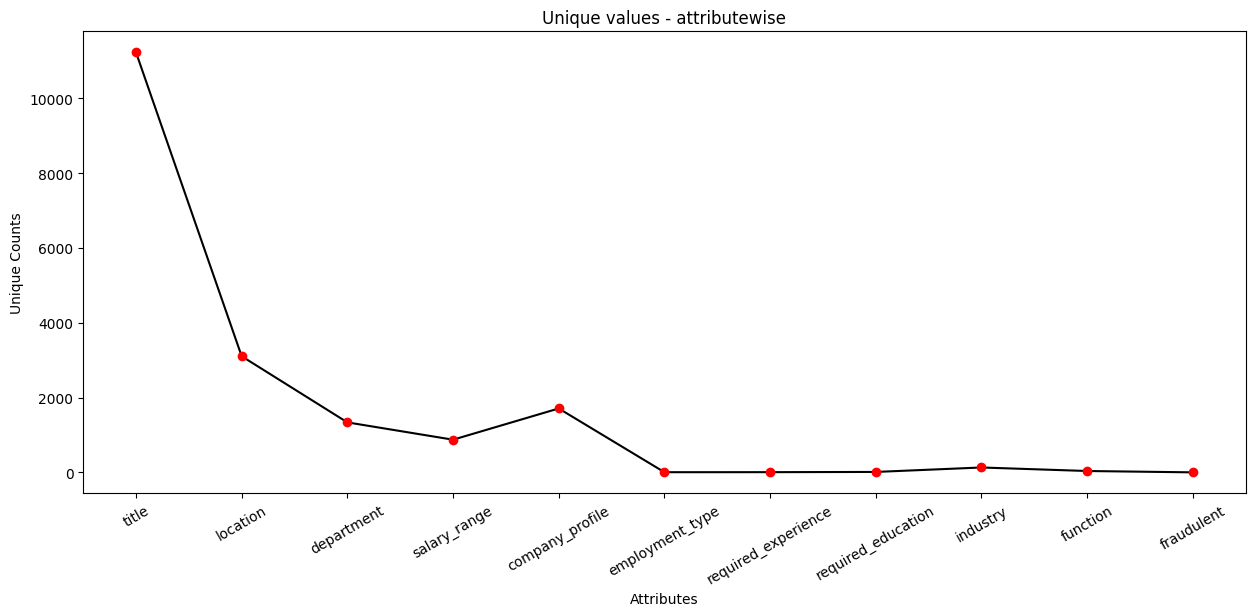

In [5]:
def vis_cols():
    dbf = df_selected_cols
    unq_vals = [dbf[col].unique().size for col in dbf.columns]
    print([(unq_vals[i],dbf.columns[i]) for i in range(len(unq_vals))])
    print(dbf.columns)
    f_unq, ax_unq = plt.subplots(1,1,figsize=(15,6))
    ax_unq.plot(list(dbf.columns), unq_vals, "k-")
    ax_unq.plot(list(dbf.columns), unq_vals, "ro")
    ax_unq.set_title("Unique values - attributewise")
    ax_unq.set_xlabel("Attributes")
    ax_unq.set_ylabel("Unique Counts")
    ax_unq.set_xticklabels(list(dbf.columns), rotation=30)
vis_cols()

### Data Split

In [6]:
# train data - 75% / 80%
# test data - 25% / 20%

X = df_selected_cols.drop(['fraudulent'],axis=1)
Y = df_selected_cols["fraudulent"]

### splitting(X, Y):
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X, Y, stratify=Y, test_size=0.20, shuffle=True, random_state=8)
X_train_25, X_test_25, y_train_25, y_test_25 = train_test_split(X, Y, stratify=Y, test_size=0.25, shuffle=True, random_state=8)

### SMOTE

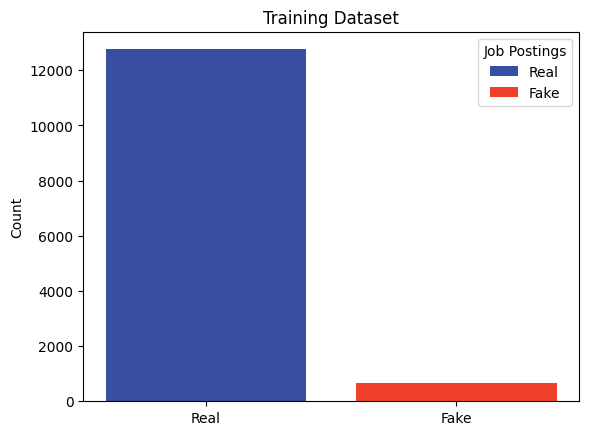

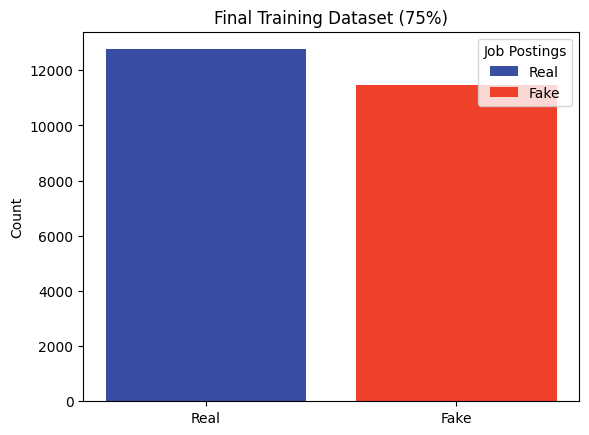

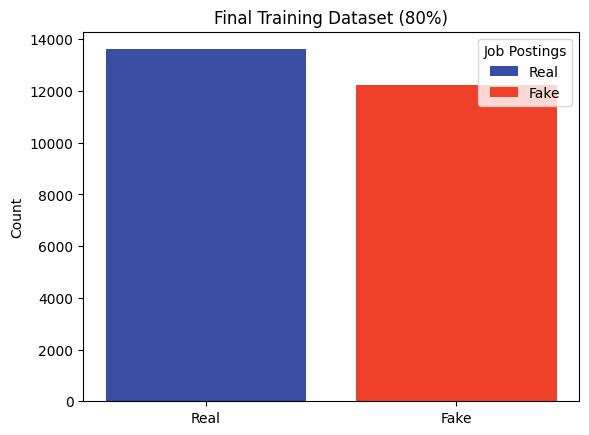

In [7]:
# X = df_selected_cols.drop(['fraudulent'],axis=1)
# y = df_selected_cols["fraudulent"]
df_train_data = pd.concat([X_train_25, y_train_25], axis=1)
visualize_data_class(df_train_data, "Training Dataset")


oversample = SMOTE(sampling_strategy=0.9)
X_train_smoted_25, y_train_smoted_25 = oversample.fit_resample(X_train_25, y_train_25)
df_tv_smoted_25 = pd.concat([X_train_smoted_25, y_train_smoted_25], axis=1)
visualize_data_class(df_tv_smoted_25, "Final Training Dataset (75%)")

X_train_smoted_20, y_train_smoted_20 = oversample.fit_resample(X_train_20, y_train_20)
df_tv_smoted_20 = pd.concat([X_train_smoted_20, y_train_smoted_20], axis=1)
visualize_data_class(df_tv_smoted_20, "Final Training Dataset (80%)")


## Data mining

We are planning to evaluate the below classifiers for our problem statement-
• K-Nearest Neighbors (KNN)
• Decision Tree
• Naive Bayes Classifier
• Logistic Regression
The models are evaluated based on results from K-Fold Cross Validation for the value of k=10

### Classifiers

In [8]:
def smoted_cv(model, X_train, y_train, text_here="this model"):
    steps = [('over', SMOTE()), ('model', model)]
    pipeline = Pipeline(steps=steps)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1)
    print("Recall for", text_here, ":", np.mean(scores))

In [9]:
def evaluate_data(X_train, y_train):
    print("\n--- KNN Classifier ---")
    n = [1, 3, 5, 10]
    for k in n:
        smoted_cv(KNeighborsClassifier(n_neighbors=k), X_train, y_train, text_here=(str(k)+"NN"))

    print("\n--- Decision Tree Classifier ---")
    smoted_cv(DecisionTreeClassifier(), X_train, y_train, text_here="Decision Tree")

    print("\n--- Naive Bayes Classifier ---")
    smoted_cv(GaussianNB(), X_train, y_train, text_here="Naive Bayes")

    print("\n--- Logistic Regression Classifier ---")
    smoted_cv(LogisticRegression(random_state=1), X_train, y_train, text_here="Logistic Regression")

In [10]:
evaluate_data(X_train_25, y_train_25)


--- KNN Classifier ---
Recall for 1NN : 0.6183814102564104
Recall for 3NN : 0.6466506410256412
Recall for 5NN : 0.6692387820512823
Recall for 10NN : 0.6979807692307695

--- Decision Tree Classifier ---
Recall for Decision Tree : 0.7251522435897437

--- Naive Bayes Classifier ---
Recall for Naive Bayes : 0.6008814102564105

--- Logistic Regression Classifier ---
Recall for Logistic Regression : 0.5844871794871797


In [11]:
evaluate_data(X_train_20, y_train_20)


--- KNN Classifier ---
Recall for 1NN : 0.5983712905452038
Recall for 3NN : 0.6349275362318841
Recall for 5NN : 0.6580676328502416
Recall for 10NN : 0.6868944099378882

--- Decision Tree Classifier ---
Recall for Decision Tree : 0.7311801242236023

--- Naive Bayes Classifier ---
Recall for Naive Bayes : 0.6006970324361628

--- Logistic Regression Classifier ---
Recall for Logistic Regression : 0.5877639751552795


## Inference

There are different metrics upon which we can evaluate the performance of our models. Metrics such
as Recall / Sensitivity, Precision, F1 Score etc can be utilized. We are specifically focusing on the Sensitivity
metrics for evaluation.


The Sensitivity value of a machine learning model is a measure of its ability to detect positive instances.
It’s also referred to as the true positive rate (TPR) or recall. Sensitivity is used to assess model performance
because it shows how many positive instances the model correctly identified. A model with high sensitivity will
have few false negatives, implying that it will miss some positive instances. In other words, sensitivity assesses a
model’s ability to correctly identify positive examples. This is significant because we want our models to be able
to detect all positive instances in order to make accurate predictions.


For our project, we have assumed the positive scenario to be a prediction of Fraudulent job posting and
a negative to be Legitimate job posting. The scenario of having a False negative, i.e. predicting a job to be genuine
whereas in actual it was fraudulent would carry a higher cost as it would have a critical impact on the applicant in
terms of monetary status. Since, Sensitivity focuses on reducing the false negatives in the system, we are using
this metric for evaluating the models.

Therefore, for our model evaluations we'll be preferring Recall measure

In [12]:
def m_predict(model, x_data, y_data, typ="test"):
    y_pred = model.predict(x_data)
    accuracy = metrics.accuracy_score(y_data, y_pred)
    recall = metrics.recall_score(y_data, y_pred)
    precision = metrics.precision_score(y_data, y_pred)
    mets = {'Accuracy': accuracy, 'Recall': recall, 'Precision': precision}
    return mets

In [17]:
### decision_tree_classifier(data):
print("\n--- Final Classifier - Decision Tree ---")
all_metri_tv_smoted_25 = pd.DataFrame()
model_tv_smoted_25 = DecisionTreeClassifier().fit(X_train_smoted_25,y_train_smoted_25)

mets_t_smoted_25 = m_predict(model_tv_smoted_25, X_test_25, y_test_25, typ="test")
metri_t_smoted_25 = pd.DataFrame(data=mets_t_smoted_25, index=["Test"])
all_metri_tv_smoted_25 = pd.concat([all_metri_tv_smoted_25, metri_t_smoted_25])

print("\n:: Test Dataset (25%) - with Decision Tree ::")
print(tabulate.tabulate(all_metri_tv_smoted_25, headers='keys', tablefmt="fancy_grid"))

all_metri_tv_smoted_20 = pd.DataFrame()
model_tv_smoted_20 = DecisionTreeClassifier().fit(X_train_smoted_20,y_train_smoted_20)

mets_t_smoted_20 = m_predict(model_tv_smoted_20, X_test_20, y_test_20, typ="test")
metri_t_smoted_20 = pd.DataFrame(data=mets_t_smoted_20, index=["Test"])
all_metri_tv_smoted_20 = pd.concat([all_metri_tv_smoted_20, metri_t_smoted_20])

print("\n:: Test Dataset (20%) - with Decision Tree ::")
print(tabulate.tabulate(all_metri_tv_smoted_20, headers='keys', tablefmt="fancy_grid"))


--- Final Classifier - Decision Tree ---

:: Test Dataset (25%) - with Decision Tree ::
╒══════╤════════════╤══════════╤═════════════╕
│      │   Accuracy │   Recall │   Precision │
╞══════╪════════════╪══════════╪═════════════╡
│ Test │   0.943848 │ 0.695853 │    0.449405 │
╘══════╧════════════╧══════════╧═════════════╛

:: Test Dataset (20%) - with Decision Tree ::
╒══════╤════════════╤══════════╤═════════════╕
│      │   Accuracy │   Recall │   Precision │
╞══════╪════════════╪══════════╪═════════════╡
│ Test │   0.941834 │ 0.705202 │    0.437276 │
╘══════╧════════════╧══════════╧═════════════╛


# Conclusion

The real and fake job posting project taken was selected to solve a real world challenging issue. This project aims to
provide a solution to this problem by classifying jobs as fake or real job postings. After implementing and observing the results from the 4 models for the recall score, we can conclude that the Decision Tree, although a simple model performs better than the other models on the cross-validation scores. The KNN model also competes closely with that of the Decision tree, but it lacks the speed in predicting that of the decision tree as it is a lazy evaluation model. Therefore, for our problem statement, we continued with the decision tree model with the final testing data.

Naive Bayes and Logisitic Regression model was observed with low values of recall for our problem statement. For Naive Bayes, one major reason for these low scores would be violation of the features independence assumption. There are certain features in the dataset, which logically should depend upon each other. One such example would be Department and fields such as required_education and required_experience. In the real-world data, there are usually such scenarios where some department prefer people with experience or education, which makes the fields dependent and thus violate the base assumption of Naive Bayes. Similarly, for Logisitic Regression, the features should be linearly dependent which was not followed in the current dataset. This would be the reason for the low scores for the Logisitic Regression model. 

Therefore, we selected the Decision Tree classifier as it was yielding a decent value in comparison to other models for recall. The performance of the model to unseen data was also captured and a recall value of 0.695853 and 0.705202 were observed for different splits for training and testing data.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f9782cd8-5619-46a2-b23e-37504f214121' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>